In [1]:
import pandas as pd
from src.constants import FIELD_SEP, LINE_SEP

In [2]:
print(FIELD_SEP)

|||


In [3]:
df = pd.read_csv(filepath_or_buffer='processedData/articles-training-byarticle.txt',
                 sep="\|\|\|",
                 names=['article_id', 'title', 'articleContent', 'hyperpartisan']
                 )

/home/abnv/projects/ire-proj/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df.head()

,article_id,title,articleContent,hyperpartisan
0,0,Kucinich: Reclaiming the money power,From flickr.com: Money {MID-161793} Money ( I...,True
1,1,Trump Just Woke Up & Viciously Attacked Puerto...,Donald Trump ran on many braggadocios and lar...,True
2,2,"Liberals wailing about gun control, but what a...",Photo By Justin Sullivan/Getty Images In resp...,True
3,3,Laremy Tunsil joins NFL players in kneeling du...,After Colin Kaepernick rightly chose to kneel ...,True
4,4,It's 1968 All Over Again,"Almost a half-century ago, in 1968, the United...",False


In [5]:
len(df[df.hyperpartisan==True]), len(df[df.hyperpartisan==False])

(238, 407)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [7]:
X = df.articleContent.values
y = df.hyperpartisan.values

tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,3), max_df=0.9, min_df=0.05)
X_tfidf = tfidf.fit_transform(X)

X_tfidf_train, X_tfidf_validate, y_train, y_validate = train_test_split(X_tfidf,y, test_size = 0.2, random_state=1234)

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()

lrmodel.fit(X_tfidf_train, y_train)

y_pred = lrmodel.predict(X_tfidf_validate)

from sklearn.metrics import f1_score, accuracy_score

print("f1 score: ", f1_score(y_validate, y_pred, average=None) *100)
print('accuracy: ', accuracy_score(y_validate, y_pred) *100)

f1 score:  [87.56756757 68.49315068]
accuracy:  82.17054263565892


/home/abnv/projects/ire-proj/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(33.0, 0.5, 'True')

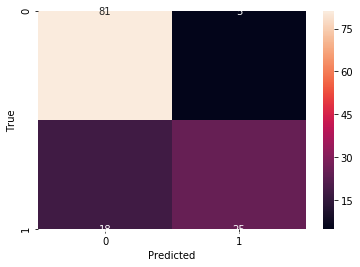

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm = confusion_matrix(y_true=y_validate, y_pred=y_pred, labels=[False, True])
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True') 